<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_4_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n20.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,8.554881e+07,8.554902e+07,-1.511091e+06,8.706011e+07
1,0.0,1.0,88.215495,94.604408,36.752253,2.182266e+07,2.182289e+07,-2.298134e+06,2.412103e+07
2,0.0,2.0,75.723322,35.232029,46.417423,-1.483147e+06,-1.482980e+06,-1.081515e+06,-4.014648e+05
3,0.0,3.0,38.055184,66.641168,96.212257,-5.412243e+07,-5.412222e+07,8.277538e+05,-5.494997e+07
4,0.0,4.0,68.821230,68.543753,46.272811,-3.512021e+07,-3.512001e+07,-1.371226e+06,-3.374879e+07
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-1.404983e+07,-1.404965e+07,-2.326742e+05,-1.381698e+07
249996,999.0,246.0,32.379447,24.201317,94.176224,-2.639171e+05,-2.637564e+05,5.877126e+05,-8.514689e+05
249997,999.0,247.0,73.636953,77.707721,80.827540,4.369306e+07,4.369331e+07,-8.635670e+06,5.232898e+07
249998,999.0,248.0,96.730468,97.527144,33.411083,1.420469e+08,1.420472e+08,-8.921751e+06,1.509689e+08


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,8.554881e+07,8.554902e+07,-1.511091e+06,8.706011e+07
1,0.0,1.0,88.215495,94.604408,36.752253,2.182266e+07,2.182289e+07,-2.298134e+06,2.412103e+07
2,0.0,2.0,75.723322,35.232029,46.417423,-1.483147e+06,-1.482980e+06,-1.081515e+06,-4.014648e+05
3,0.0,3.0,38.055184,66.641168,96.212257,-5.412243e+07,-5.412222e+07,8.277538e+05,-5.494997e+07
4,0.0,4.0,68.821230,68.543753,46.272811,-3.512021e+07,-3.512001e+07,-1.371226e+06,-3.374879e+07
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-1.404983e+07,-1.404965e+07,-2.326742e+05,-1.381698e+07
249996,999.0,246.0,32.379447,24.201317,94.176224,-2.639171e+05,-2.637564e+05,5.877126e+05,-8.514689e+05
249997,999.0,247.0,73.636953,77.707721,80.827540,4.369306e+07,4.369331e+07,-8.635670e+06,5.232898e+07
249998,999.0,248.0,96.730468,97.527144,33.411083,1.420469e+08,1.420472e+08,-8.921751e+06,1.509689e+08


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    57.585513  99.226585  ... -1.511091e+06  8.706011e+07
      1.0    88.215495  94.604408  ... -2.298134e+06  2.412103e+07
      2.0    75.723322  35.232029  ... -1.081515e+06 -4.014648e+05
      3.0    38.055184  66.641168  ...  8.277538e+05 -5.494997e+07
      4.0    68.821230  68.543753  ... -1.371226e+06 -3.374879e+07
...                ...        ...  ...           ...           ...
999.0 245.0  82.142416  53.368686  ... -2.326742e+05 -1.381698e+07
      246.0  32.379447  24.201317  ...  5.877126e+05 -8.514689e+05
      247.0  73.636953  77.707721  ... -8.635670e+06  5.232898e+07
      248.0  96.730468  97.527144  ... -8.921751e+06  1.509689e+08
      249.0  92.431783  65.077315  ... -5.290949e+06  1.263606e+07

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    57.585513  99.226585  ... -1.511091e+06  8.706011e+07
      1.0    88.215495  94.604408  ... -2.298134e+06  2.412103e+07
      2.0    75.723322  35.232029  ... -1.081515e+06 -4.014648e+05
      3.0    38.055184  66.641168  ...  8.277538e+05 -5.494997e+07
      4.0    68.821230  68.543753  ... -1.371226e+06 -3.374879e+07
...                ...        ...  ...           ...           ...
999.0 245.0  82.142416  53.368686  ... -2.326742e+05 -1.381698e+07
      246.0  32.379447  24.201317  ...  5.877126e+05 -8.514689e+05
      247.0  73.636953  77.707721  ... -8.635670e+06  5.232898e+07
      248.0  96.730468  97.527144  ... -8.921751e+06  1.509689e+08
      249.0  92.431783  65.077315  ... -5.290949e+06  1.263606e+07

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,8.554881e+07,8.554902e+07,-1.511091e+06,8.706011e+07
1,0.0,1.0,88.215495,94.604408,36.752253,2.182266e+07,2.182289e+07,-2.298134e+06,2.412103e+07
2,0.0,2.0,75.723322,35.232029,46.417423,-1.483147e+06,-1.482980e+06,-1.081515e+06,-4.014648e+05
3,0.0,3.0,38.055184,66.641168,96.212257,-5.412243e+07,-5.412222e+07,8.277538e+05,-5.494997e+07
4,0.0,4.0,68.821230,68.543753,46.272811,-3.512021e+07,-3.512001e+07,-1.371226e+06,-3.374879e+07
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-1.404983e+07,-1.404965e+07,-2.326742e+05,-1.381698e+07
249996,999.0,246.0,32.379447,24.201317,94.176224,-2.639171e+05,-2.637564e+05,5.877126e+05,-8.514689e+05
249997,999.0,247.0,73.636953,77.707721,80.827540,4.369306e+07,4.369331e+07,-8.635670e+06,5.232898e+07
249998,999.0,248.0,96.730468,97.527144,33.411083,1.420469e+08,1.420472e+08,-8.921751e+06,1.509689e+08


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    57.585513  99.226585  ... -1.511091e+06  8.706011e+07
      1.0    88.215495  94.604408  ... -2.298134e+06  2.412103e+07
      2.0    75.723322  35.232029  ... -1.081515e+06 -4.014648e+05
      3.0    38.055184  66.641168  ...  8.277538e+05 -5.494997e+07
      4.0    68.821230  68.543753  ... -1.371226e+06 -3.374879e+07
...                ...        ...  ...           ...           ...
999.0 245.0  82.142416  53.368686  ... -2.326742e+05 -1.381698e+07
      246.0  32.379447  24.201317  ...  5.877126e+05 -8.514689e+05
      247.0  73.636953  77.707721  ... -8.635670e+06  5.232898e+07
      248.0  96.730468  97.527144  ... -8.921751e+06  1.509689e+08
      249.0  92.431783  65.077315  ... -5.290949e+06  1.263606e+07

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

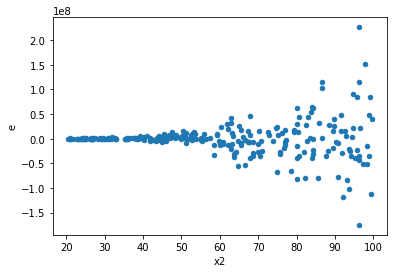

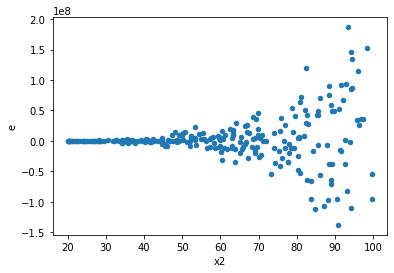

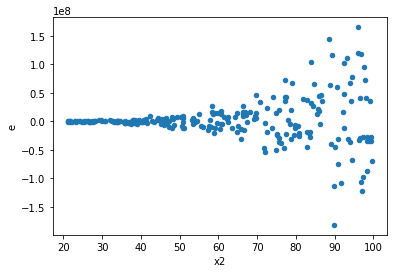

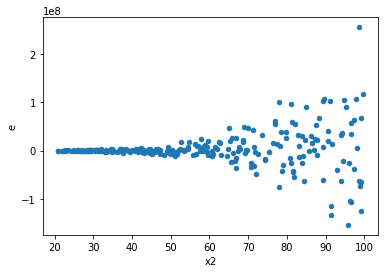

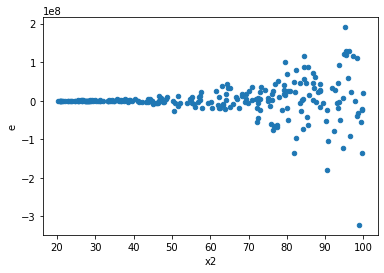

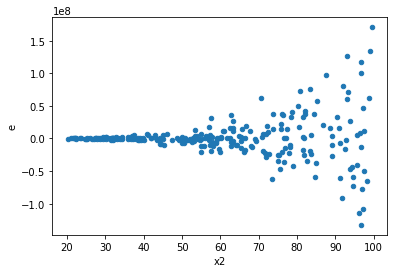

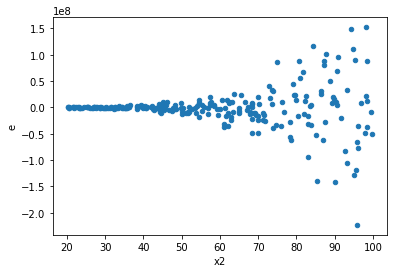

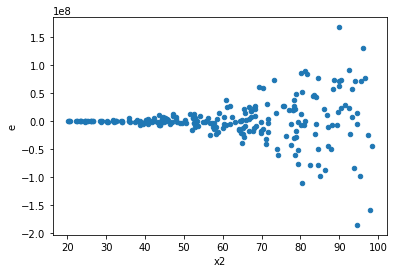

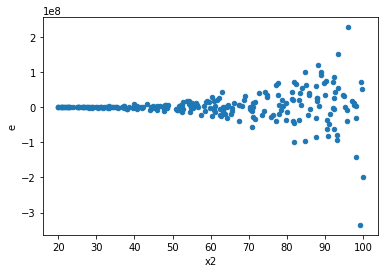

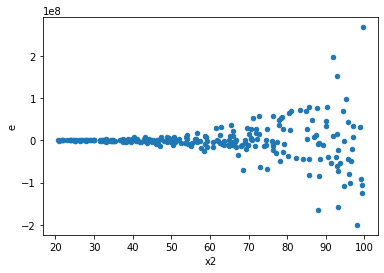

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,3.1065056416239974e+17,999042127669520.5,3235943376691664.0,10406688829890.838,310.94841304346056,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,3.6174010580138726e+17,1671692899218866.2,3768126102097784.0,17413467700196.523,216.39148313091354,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,3.4757889744077344e+17,913792429394857.2,3620613515008056.5,9518671139529.764,380.3696400406287,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,3.662814147025516e+17,464080996275252.7,3815431403151579.5,4834177044533.882,789.2618263672774,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,4.9333456009446406e+17,1396276688920232.8,5138901667650667.0,14544548842919.092,353.3214899376204,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,2.5901053445358e+17,683563464439904.9,2698026400558125.0,7120452754582.343,378.91219751747104,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,3.585056560566552e+17,684300631166210.1,3734433917256825.5,7128131574648.022,523.9008116150306,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,2.991446010972067e+17,1629759604332803.2,3116089594762570.0,16976662545133.367,183.55136567498346,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,4.402969108729433e+17,1054245848389138.2,4586426154926493.0,10981727587386.857,417.6415885779452,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,3.1065056416239974e+17,999042127669520.5,3235943376691664.0,10406688829890.838,310.94841304346056,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,3.6174010580138726e+17,1671692899218866.2,3768126102097784.0,17413467700196.523,216.39148313091354,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,3.4757889744077344e+17,913792429394857.2,3620613515008056.5,9518671139529.764,380.3696400406287,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,3.662814147025516e+17,464080996275252.7,3815431403151579.5,4834177044533.882,789.2618263672774,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,4.9333456009446406e+17,1396276688920232.8,5138901667650667.0,14544548842919.092,353.3214899376204,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,2.5901053445358e+17,683563464439904.9,2698026400558125.0,7120452754582.343,378.91219751747104,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,3.585056560566552e+17,684300631166210.1,3734433917256825.5,7128131574648.022,523.9008116150306,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,2.991446010972067e+17,1629759604332803.2,3116089594762570.0,16976662545133.367,183.55136567498346,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,4.402969108729433e+17,1054245848389138.2,4586426154926493.0,10981727587386.857,417.6415885779452,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64